<a href="https://colab.research.google.com/github/AhnJG/AI-Project/blob/master/Colab/Audio/torch_audio_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchaudio

     |████████████████████████████████| 3.2MB 2.5MB/s 


In [2]:
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt


In [8]:
file_path = './sample_data/blues.00000.wav'
data, sr = torchaudio.load(file_path)
print(data.shape, sr)

torch.Size([1, 661794]) 22050


In [10]:
data.shape[1] / sr

30.013333333333332

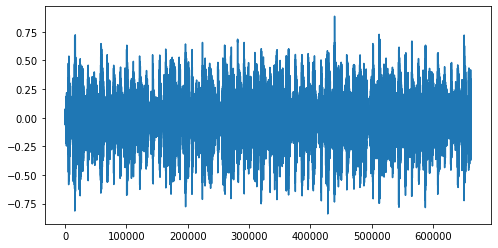

In [14]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(data[0, :])
plt.show()

In [16]:
spectrogram = nn.Sequential(
    AT.Spectrogram(
        n_fft=512,
        win_length=400,
        hop_length=160
    ),
    AT.AmplitudeToDB()
)

mel_spectrogram = nn.Sequential(
    AT.MelSpectrogram(
        sample_rate=sr,
        n_fft=512,
        win_length=400,
        hop_length=160,
        n_mels=80
    ),
    AT.AmplitudeToDB()
)

In [17]:
spec = spectrogram(data)
mel = mel_spectrogram(data)
print(spec.shape, mel.shape)

torch.Size([1, 257, 4137]) torch.Size([1, 80, 4137])


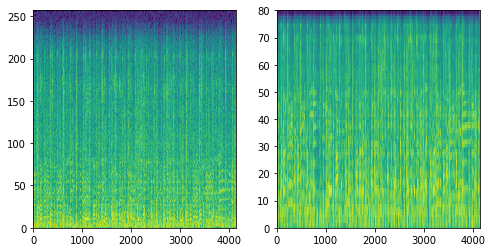

In [18]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].pcolor(spec[0])
ax[1].pcolor(mel[0])
plt.show()

In [19]:
spec[0].shape

torch.Size([257, 4137])